### D. Read Data → PostgreSQL - (Prepare data for EDA)

In [113]:
import os
import pandas as pd
from sqlalchemy import create_engine


def get_db_engine():
    db_url = (
        f"postgresql://{"avnadmin"}:{"AVNS_WUAxDaCB98_BJRKU3C7"}@"
        f"{"myproject-db-ooluwakemmie-a56d.j.aivencloud.com"}:{"17947"}/{"defaultdb"}?"
    )

    return create_engine(db_url)

# Create a database engine
engine = get_db_engine()

# Define the SQL query to fetch data from the database
patients_query = "SELECT * FROM patients"
sessions_query = "SELECT * FROM sessions"   
feedback_query = "SELECT * FROM feedback"
interventions_query = "SELECT * FROM interventions"
clinics_query = "SELECT * FROM clinics"
dropout_flags_query = "SELECT * FROM dropout_flags"

# Fetch data from the database into pandas DataFrames
patients_df = pd.read_sql(patients_query, engine)
sessions_df = pd.read_sql(sessions_query, engine)
feedback_df = pd.read_sql(feedback_query, engine)
interventions_df = pd.read_sql(interventions_query, engine)
clinics_df = pd.read_sql(clinics_query, engine)     
dropout_flags_df = pd.read_sql(dropout_flags_query, engine)


### D1- Display basic info and summary statistics for each table

In [114]:
patients_df.head()
patients_df.info()
patients_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   patient_id       5000 non-null   int64         
 1   age              5000 non-null   int64         
 2   gender           5000 non-null   object        
 3   bmi              5000 non-null   float64       
 4   smoker           5000 non-null   bool          
 5   chronic_cond     1931 non-null   object        
 6   injury_type      5000 non-null   object        
 7   signup_date      5000 non-null   datetime64[ns]
 8   referral_source  5000 non-null   object        
 9   consent          5000 non-null   bool          
 10  clinic_id        5000 non-null   int64         
 11  insurance_type   5000 non-null   object        
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 400.5+ KB


,patient_id,age,bmi,signup_date,clinic_id
count,5000.000000,5000.000000,5000.000000,5000,5000.000000
mean,2500.500000,50.907200,25.174580,2024-12-10 09:48:44.286283520,3.387800
min,1.000000,18.000000,17.000000,2024-06-13 00:12:44.286283,1.000000
25%,1250.750000,34.000000,22.400000,2024-09-08 00:12:44.286283008,2.000000
50%,2500.500000,51.000000,25.100000,2024-12-10 12:12:44.286283008,3.000000
75%,3750.250000,68.000000,27.700000,2025-03-11 00:12:44.286283008,5.000000
max,5000.000000,84.000000,38.800000,2025-06-12 00:12:44.286283,8.000000
std,1443.520003,19.403203,3.769633,NaN,1.749521


In [115]:
patients_df.isnull().sum()


patient_id            0
age                   0
gender                0
bmi                   0
smoker                0
chronic_cond       3069
injury_type           0
signup_date           0
referral_source       0
consent               0
clinic_id             0
insurance_type        0
dtype: int64

In [116]:
patients_df.duplicated().sum()

0

In [117]:
sessions_df.isnull().sum()

session_id           0
patient_id           0
date                 0
week                 0
duration             0
pain_level           0
exercise_type        0
home_adherence_pc    0
satisfaction         0
therapist_id         0
dtype: int64

In [118]:
feedback_df.isnull().sum()

feedback_id    0
session_id     0
comments       0
sentiment      0
dtype: int64

In [119]:
dropout_flags_df.isnull().sum()

patient_id         0
dropout            0
dropout_week    4919
dtype: int64

In [120]:
patients_df["chronic_cond"] = patients_df["chronic_cond"].fillna(patients_df["chronic_cond"].mode()[0])

In [121]:
patients_df.isnull().sum()

patient_id         0
age                0
gender             0
bmi                0
smoker             0
chronic_cond       0
injury_type        0
signup_date        0
referral_source    0
consent            0
clinic_id          0
insurance_type     0
dtype: int64

### E. EDA → (Exploratory Data Analysis)

In [122]:
import numpy as np

patients_df.head(2)
patients_df["signup_date"] = pd.to_datetime(patients_df["signup_date"])
patients_df.head(2)


bin = [0, 18, 35, 55, np.inf]
labels = ['0-18', '19-35', '36-55', '55+']
patients_df['age_group'] = pd.cut(patients_df['age'], bins=bin, labels=labels, right=False)


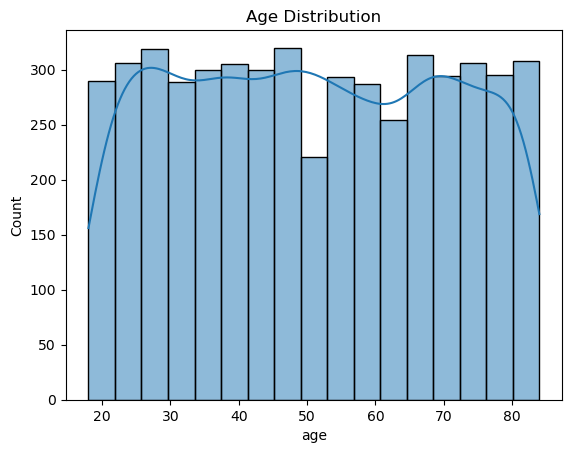

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(patients_df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

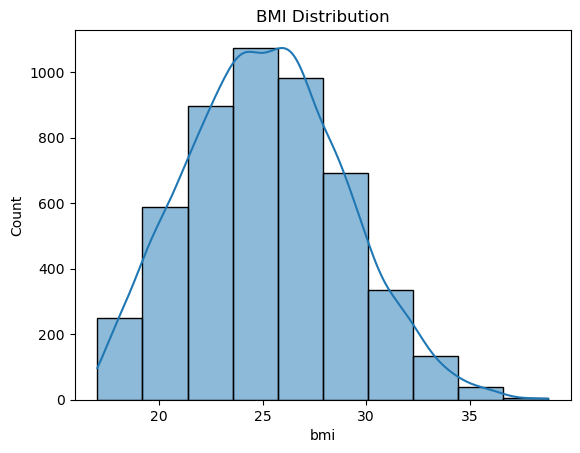

In [124]:
### BMI Distribution
sns.histplot(patients_df['bmi'], bins=10, kde=True)
plt.title('BMI Distribution')
plt.show()

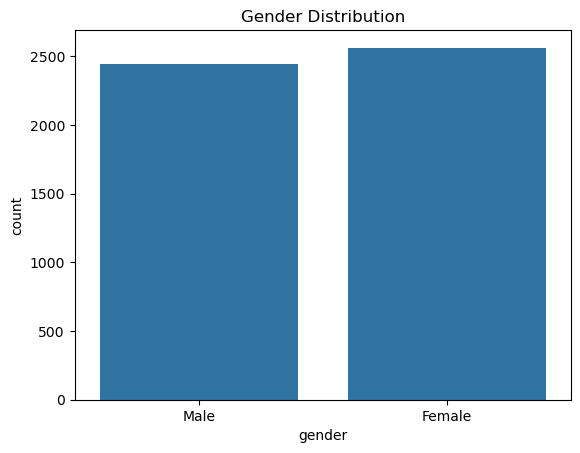

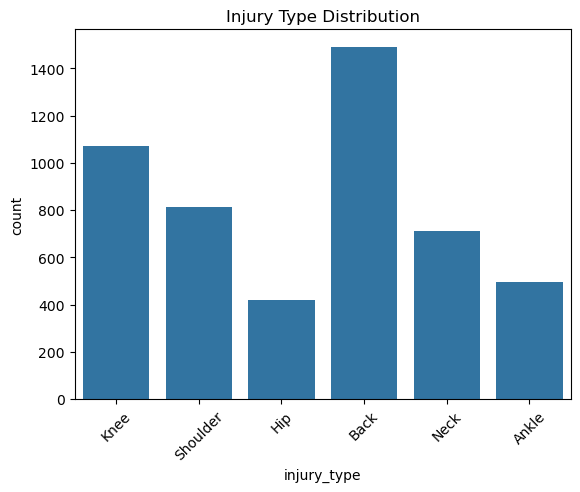

In [125]:
### Visualizing categorical data
sns.countplot(x='gender', data=patients_df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='injury_type', data=patients_df)
plt.xticks(rotation=45)
plt.title('Injury Type Distribution')
plt.show()


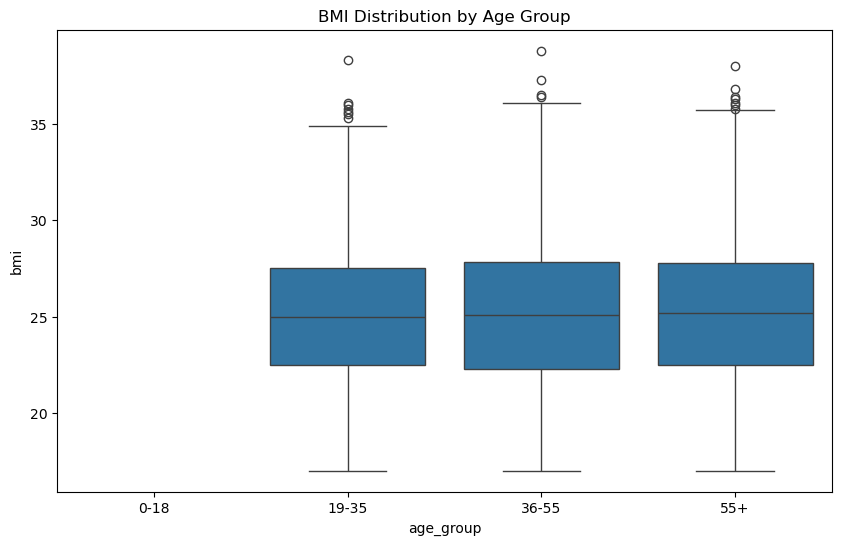

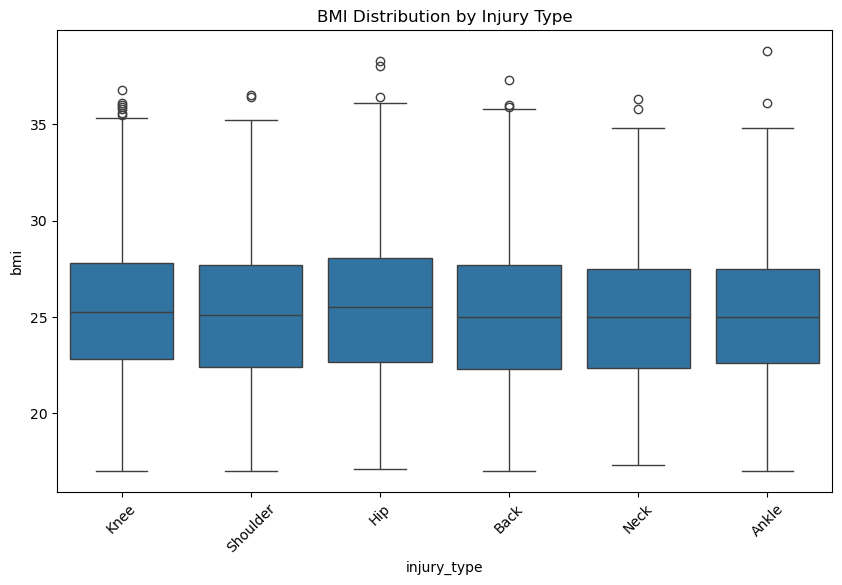

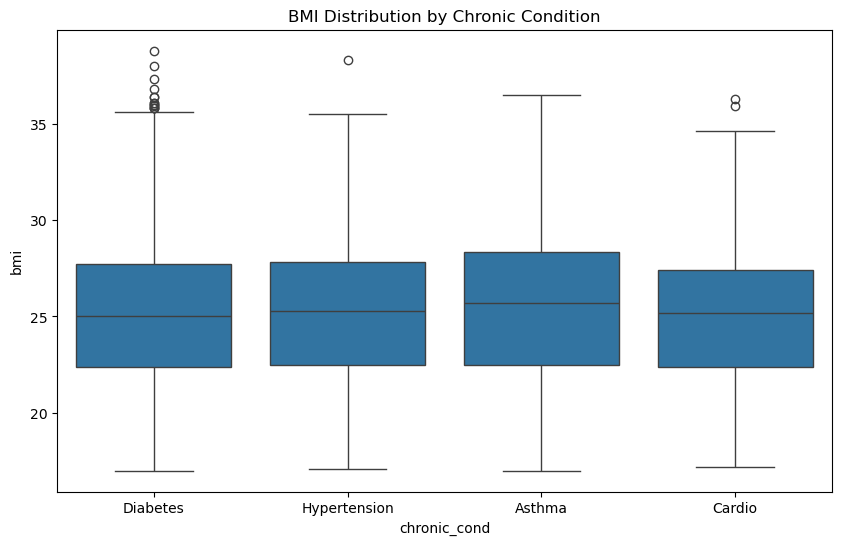

In [126]:
# Visualizing the relationship between age group and BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=patients_df)
plt.title('BMI Distribution by Age Group')
plt.show()

# Visualizing the relationship between injury type and BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='injury_type', y='bmi', data=patients_df)
plt.xticks(rotation=45)
plt.title('BMI Distribution by Injury Type')
plt.show()

# Visualizing the relationship between chronic condition and BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='chronic_cond', y='bmi', data=patients_df)
plt.title('BMI Distribution by Chronic Condition')
plt.show()

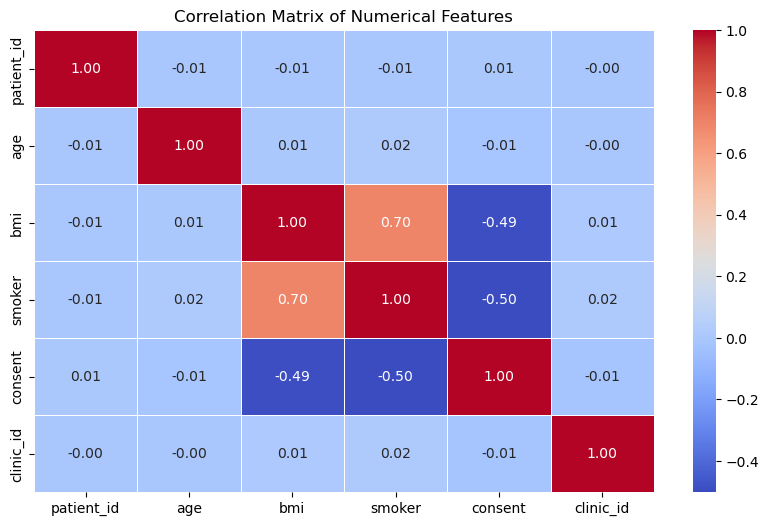

In [127]:
# Correlation Analysis

# Select only numerical columns
numerical_cols = patients_df.select_dtypes(include=['int64', 'float64', 'bool'])

# Compute correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Feature Engineering

In [128]:
### create bmi categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
    
patients_df['bmi_category'] = patients_df['bmi'].apply(categorize_bmi)

In [129]:

from datetime import datetime

### Days since sign up

# Calculate how long since they signed up
patients_df['days_since_signup'] = (datetime.now() - patients_df['signup_date']).dt.days

In [130]:
### Combine smoker + chronic condition to flag high risk
patients_df['high_risk'] = ((patients_df['smoker'] == True) & (patients_df['chronic_cond'].notnull())).astype(int)


In [131]:
### encoding categorical variables
#patients_df = pd.get_dummies(patients_df, columns=['gender', 'insurance_type', 'referral_source', 'injury_type', 'bmi_category'], drop_first=True)


In [132]:
patients_df.head(2)

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,age_group,bmi_category,days_since_signup,high_risk
0,1,29,Male,23.9,False,Diabetes,Knee,2025-04-27 00:12:44.286283,Insurance,True,6,Public,19-35,Normal weight,61,0
1,2,68,Female,31.7,True,Diabetes,Shoulder,2024-11-28 00:12:44.286283,Insurance,False,3,Public,55+,Obesity,211,1


In [133]:
### feature engineering for sessions
sessions_df['session_date'] = pd.to_datetime(sessions_df['date'])       


In [134]:
# Aggregate per patient
patient_sessions = sessions_df.groupby('patient_id').agg(
    num_sessions=('session_id', 'count'),
    avg_pain_level=('pain_level', 'mean'),
    avg_satisfaction=('satisfaction', 'mean'),
    avg_adherence=('home_adherence_pc', 'mean'),
    first_session=('date', 'min'),
    last_session=('date', 'max')
).reset_index()

# Duration in days
patient_sessions['treatment_duration_days'] = (patient_sessions['last_session'] - patient_sessions['first_session']).dt.days


In [135]:
# Merge with patient_sessions
patient_data = pd.merge(patient_sessions, dropout_flags_df, on='patient_id', how='left')

In [136]:
patient_data.head()
patient_data.describe()


,patient_id,num_sessions,avg_pain_level,avg_satisfaction,avg_adherence,first_session,last_session,treatment_duration_days,dropout_week
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,81.000000
mean,2500.500000,14.047200,1.982214,6.490064,69.327563,2024-12-14 12:49:53.406283264,2025-02-26 06:20:13.566283264,73.729400,9.481481
min,1.000000,3.000000,1.000000,5.181818,50.333333,2024-06-13 00:12:44.286283,2024-08-07 00:12:44.286283,17.000000,7.000000
25%,1250.750000,12.000000,1.692308,6.266667,66.666667,2024-09-12 00:12:44.286283008,2024-11-25 00:12:44.286283008,71.000000,9.000000
50%,2500.500000,14.000000,1.937500,6.500000,69.312500,2024-12-15 00:12:44.286283008,2025-02-27 00:12:44.286283008,76.000000,10.000000
75%,3750.250000,16.000000,2.250000,6.714286,72.083333,2025-03-15 06:12:44.286283008,2025-05-28 00:12:44.286283008,79.000000,10.000000
max,5000.000000,23.000000,4.250000,8.000000,84.250000,2025-07-04 00:12:44.286283,2025-09-02 00:12:44.286283,82.000000,10.000000
std,1443.520003,3.014629,0.399840,0.338053,4.100216,NaN,NaN,7.126341,0.760117


In [137]:
###  It has 4,919 missing values, which is a majority of the dataset
dropout_flags_df.drop(columns='dropout_week', inplace=True)


### CLUSTERING

In [138]:
# Import necessary libraries for scaling
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['num_sessions', 'avg_pain_level', 'avg_satisfaction', 'avg_adherence', 'treatment_duration_days']
X = patient_data[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [139]:
# Apply k-means clustering

from sklearn.cluster import KMeans

# Try 3 clusters for now (aligns with 3 personas)
kmeans = KMeans(n_clusters=3, random_state=42)
patient_data['cluster'] = kmeans.fit_predict(X_scaled)


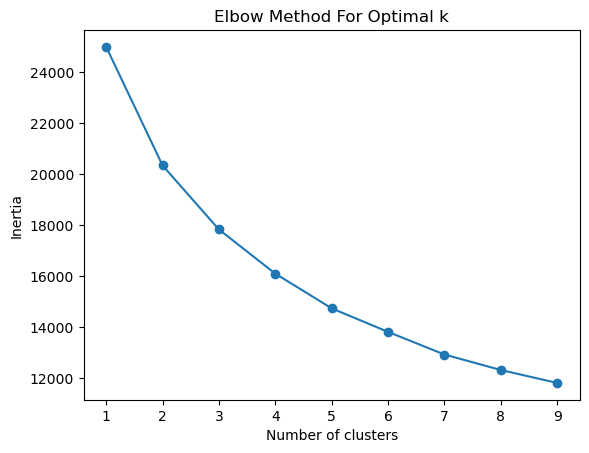

In [140]:
# Elbow method to determine optimal number of clusters(K)

import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


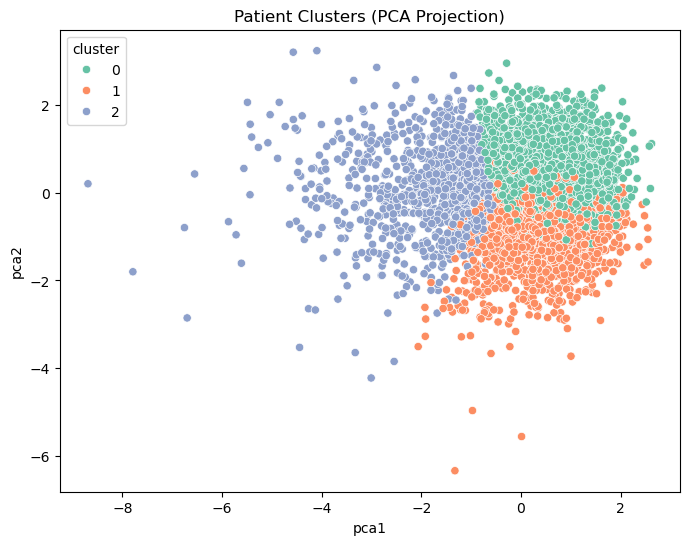

In [141]:
# Visualize with PCA

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

patient_data['pca1'] = pca_result[:, 0]
patient_data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=patient_data, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Patient Clusters (PCA Projection)')
plt.show()


In [142]:
# Label Clusters as Personas

# summarise Features by cluster

cluster_summary = patient_data.groupby('cluster')[[
    'num_sessions', 'avg_pain_level', 'avg_satisfaction',
    'avg_adherence', 'treatment_duration_days'
]].mean().round(2)

display(cluster_summary)


,num_sessions,avg_pain_level,avg_satisfaction,avg_adherence,treatment_duration_days
cluster,,,,,
0,15.77,1.85,6.47,70.41,76.58
1,13.48,2.38,6.51,67.35,75.84
2,10.92,1.72,6.49,69.68,64.18


K-Means clustering algorithm was used to segment patients based on their treatment behavior and progress. The features used included total sessions attended, average pain level, average satisfaction scores, adherence to home exercises, and total treatment duration in days. These features were standardized to ensure equal contribution to clustering, and dimensionality reduction using PCA was employed for effective visualization. After evaluation, three clear clusters emerged, which we interpreted and labeled as distinct patient personas.

In [143]:
# Add dropout flag rate per cluster

dropout_summary = patient_data.groupby('cluster')['dropout'].mean().round(2)
print("Dropout Rate by Cluster:")
print(dropout_summary)


Dropout Rate by Cluster:
cluster
0    0.00
1    0.00
2    0.07
Name: dropout, dtype: float64


In [144]:
# Manual mapping based on inspection (change numbers as needed)
cluster_personas = {
    0: 'Steady Progressor',
    1: 'Fast Improver',
    2: 'Frustrated Dropper'
}

patient_data['persona'] = patient_data['cluster'].map(cluster_personas)



In [ ]:
patient_data.head(2)

,patient_id,num_sessions,avg_pain_level,avg_satisfaction,avg_adherence,first_session,last_session,treatment_duration_days,dropout,dropout_week,cluster,pca1,pca2,persona
0,1,20,2.15,6.5,77.750,2025-04-30 00:12:44.286283,2025-07-16 00:12:44.286283,77,False,NaN,0,1.635638,1.669697,Steady Progressor
1,2,8,2.25,7.0,61.625,2024-12-03 00:12:44.286283,2025-02-11 00:12:44.286283,70,False,NaN,1,-1.375653,-2.718266,Fast Improver


In [146]:
full_data = pd.merge(patient_data, patients_df, on='patient_id', how='left')

In [147]:
#
gender_dist = full_data.groupby('persona')['gender'].value_counts(normalize=True).unstack().round(2)
display(gender_dist)


gender,Female,Male
persona,,
Fast Improver,0.50,0.50
Frustrated Dropper,0.52,0.48
Steady Progressor,0.52,0.48


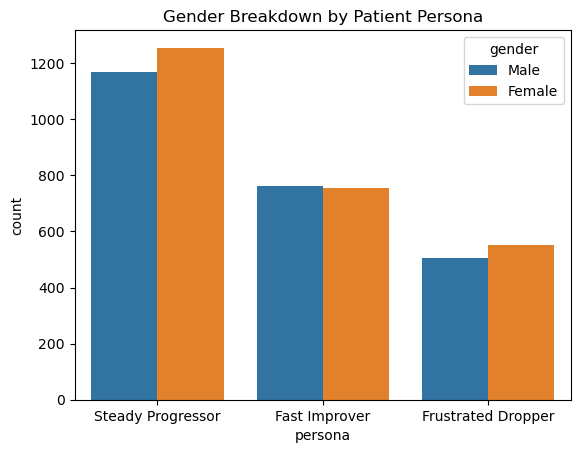

In [148]:
# Visualize gender distribution by persona
sns.countplot(data=full_data, x='persona', hue='gender')
plt.title('Gender Breakdown by Patient Persona')
plt.show()


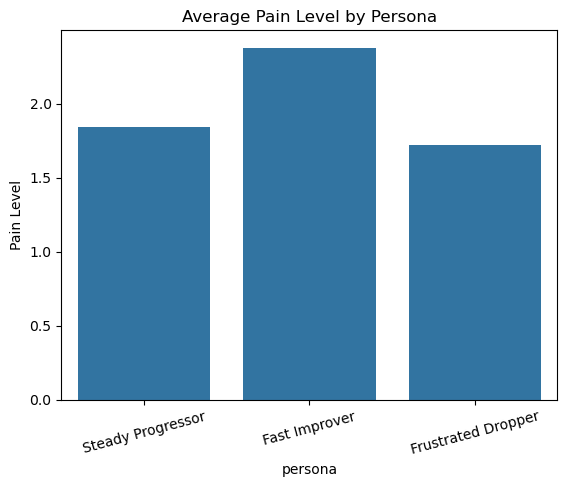

In [149]:
## Visualize average pain level by persona
sns.barplot(data=full_data, x='persona', y='avg_pain_level', errorbar=None)
plt.title('Average Pain Level by Persona')
plt.ylabel('Pain Level')
plt.xticks(rotation=15)
plt.show()


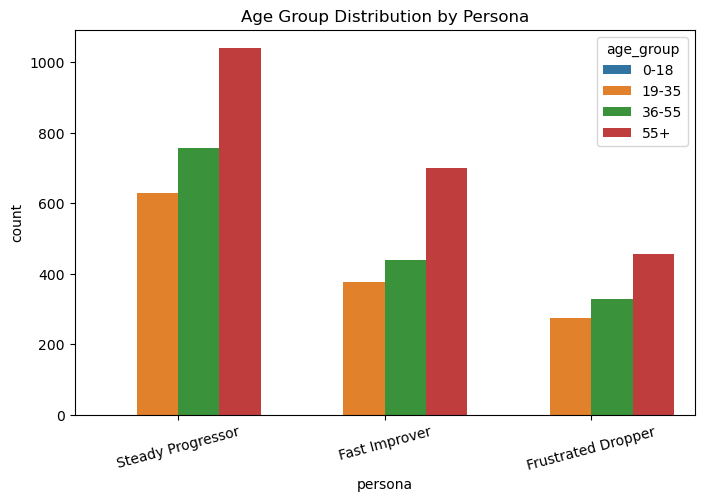

In [150]:
# Visualize age group distribution by persona
plt.figure(figsize=(8, 5))
sns.countplot(data=full_data, x='persona', hue='age_group')
plt.title('Age Group Distribution by Persona')
plt.xticks(rotation=15)
plt.show()


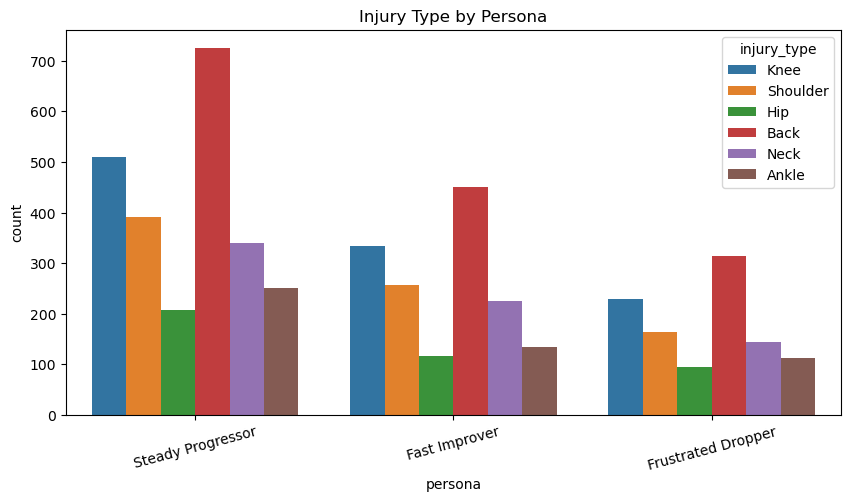

In [151]:
# visualize the injury type distribution by persona
plt.figure(figsize=(10, 5))
sns.countplot(data=full_data, x='persona', hue='injury_type')
plt.title('Injury Type by Persona')
plt.xticks(rotation=15)
plt.show()


### Findings

Persona 1 – Steady Progressors:
Patients in this group exhibit consistent engagement across an extended treatment duration. They attend a high number of sessions, demonstrate moderate pain reduction, and show relatively high satisfaction and adherence levels. Demographic analysis revealed this persona is most common among patients aged 55 and above, with a fairly even distribution across genders. The most frequently observed injuries in this group are back and knee-related. These patients respond well to ongoing rehabilitation programs and benefit from sustained support, making them ideal candidates for long-term, structured treatment plans.

Persona 2 – Fast Improvers:
This cluster represents patients who recover quickly with fewer sessions and within a shorter treatment duration. They report rapid improvement in pain levels, often show high satisfaction scores, and generally maintain good adherence to exercise recommendations. These patients tend to fall within the 19–55 age range, with an almost equal distribution of males and females. Common injury types include shoulder and knee injuries. Given their quick recovery trajectory, these patients may benefit from shorter, more intensive therapy regimens and could be considered for early discharge or alternative follow-up strategies.

Persona 3 – Frustrated Droppers:
Patients in this cluster show low engagement, attending fewer sessions over a short duration. Their pain levels tend to remain high or moderately high, and they often report lower satisfaction and exercise adherence. This group is somewhat diverse in age, though more concentrated in the 36–55 and 55+ brackets, and has a slightly higher representation of female patients. Injuries involving the back and hip are more frequent here. These individuals may be at risk of dropping out or disengaging from care, and would benefit from early identification and proactive support strategies such as personalized check-ins, motivational interviewing, or more flexible treatment options.